In [3]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [5]:
l_sensor = ctrl.Antecedent(np.arange(0.5,3+0.01,0.01),"l_sensor")
r_sensor = ctrl.Antecedent(np.arange(0.5,3+0.01,0.01),"r_sensor")
c_sensor = ctrl.Antecedent(np.arange(0.5,3+0.01,0.01),"c_sensor")

motor1  = ctrl.Consequent(np.arange(-100,100),"motor1")
motor2  = ctrl.Consequent(np.arange(-100,100),"motor2")

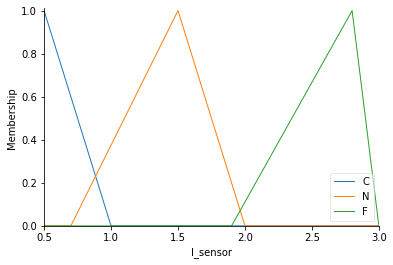

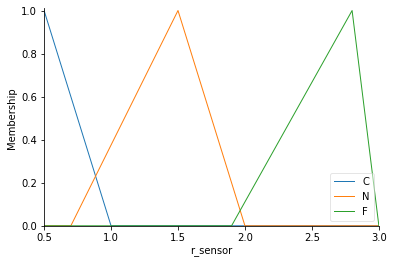

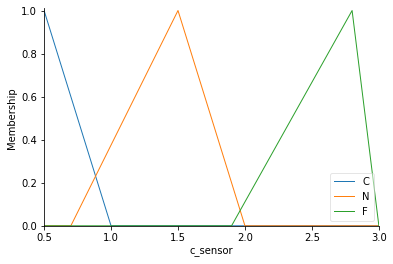

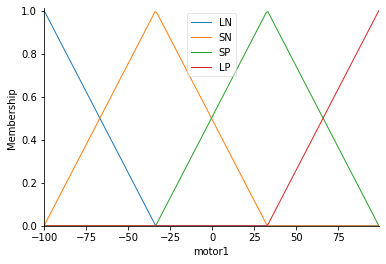

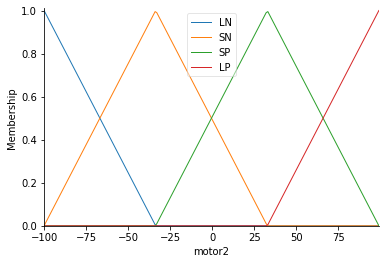

In [7]:
l_sensor["C"] = fuzz.trimf(l_sensor.universe,[0.5,0.5,1])
l_sensor["N"] = fuzz.trimf(l_sensor.universe,[0.7,1.5,2])
l_sensor["F"] = fuzz.trimf(l_sensor.universe,[1.9,2.8,3])

r_sensor["C"] = fuzz.trimf(r_sensor.universe,[0.5,0.5,1])
r_sensor["N"] = fuzz.trimf(r_sensor.universe,[0.7,1.5,2])
r_sensor["F"] = fuzz.trimf(r_sensor.universe,[1.9,2.8,3])

c_sensor["C"] = fuzz.trimf(c_sensor.universe,[0.5,0.5,1])
c_sensor["N"] = fuzz.trimf(c_sensor.universe,[0.7,1.5,2])
c_sensor["F"] = fuzz.trimf(c_sensor.universe,[1.9,2.8,3])

motor1.automf(names = ["LN","SN","SP","LP"])
motor2.automf(names = ["LN","SN","SP","LP"])
l_sensor.view()
r_sensor.view()
c_sensor.view()
motor1.view()
motor2.view()

In [8]:
rule1 = ctrl.Rule(c_sensor["F"],[motor1["LP"],motor2["LP"]])
rule2 = ctrl.Rule((c_sensor["C"]|((l_sensor["C"]|l_sensor["C"]) or (l_sensor["C"]|r_sensor["N"]) or (r_sensor["C"]|l_sensor["N"]) or (l_sensor["N"]|r_sensor["N"]))),[motor1["LP"],motor2["LN"]])
rule3 = ctrl.Rule(c_sensor["C"]|((l_sensor["C"]|r_sensor["F"]) or (l_sensor["N"]|r_sensor["F"])),[motor1["LP"],motor2["SP"]])
rule4 = ctrl.Rule(l_sensor["F"]|(c_sensor["C"] or c_sensor["N"]),[motor1["SP"],motor2["LP"]])
rule5 = ctrl.Rule((c_sensor["N"]|((l_sensor["C"]|l_sensor["C"]) or (l_sensor["C"]|r_sensor["N"]) or (r_sensor["C"]|l_sensor["N"]) or (l_sensor["N"]|r_sensor["N"]))),[motor1["SP"],motor2["SN"]])
rule6 = ctrl.Rule(c_sensor["N"]|((l_sensor["C"]|r_sensor["F"]) or (l_sensor["N"]|r_sensor["F"])),[motor1["LP"],motor2["SP"]])

In [9]:
sensor_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
sensor_compute = ctrl.ControlSystemSimulation(sensor_ctrl)

45.05222889245263
3.1082446506192842


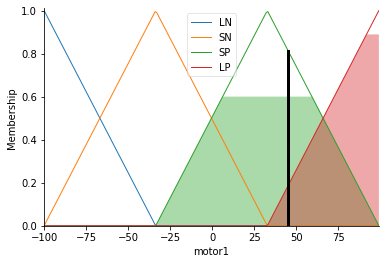

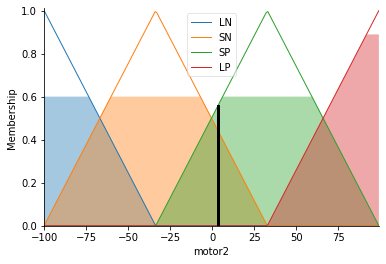

In [10]:
sensor_compute.input["l_sensor"]  = 0.7
sensor_compute.input["r_sensor"]  = 0.7
sensor_compute.input["c_sensor"]  = 2.7
sensor_compute.compute()
print(sensor_compute.output["motor1"])
print(sensor_compute.output["motor2"])

motor1.view(sim=sensor_compute)
motor2.view(sim=sensor_compute)